QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

You're given a CSV file containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.





In [ ]:
#Get the data into Jupyter notebook from GitHub
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')


In [ ]:
import pandas as pd

#Creates pandas DataFrame with the downloaded data
medical_df = pd.read_csv('medical.csv')
medical_df


EXERCISE: Before proceeding further, take a moment to think about how can approach this problem. List five or more ideas that come to your mind below:

???
???
???
???
???

In [ ]:
medical_df.info()

In [ ]:
medical_df.describe()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#Charts shows as output and not in pop up so inline is needed
%matplotlib inline


In [ ]:
sns.set_style('darkgrid')
sns.set_context('notebook')
plt.style.use("dark_background")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of
age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive

In [ ]:
medical_df.age.describe()

In [ ]:
fig =  px.histogram(medical_df, x='age',marginal='box',nbins=47, opacity=0.8,title='Age distribution of patients')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the number of people of any given age (between 18 & 64) in the USA.

In [ ]:
fig=px.histogram(medical_df,x='bmi',marginal='box',nbins=47,opacity=0.8,title='BMI distribution of patients',color_discrete_sequence=['red'])
fig.update_layout(bargap=0.1)
fig.show()

Charges
Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [ ]:
medical_df.charges.describe()

In [ ]:
fig=px.histogram(medical_df,x='charges',marginal='box',opacity=0.8,title='Charges distribution of patients',color='smoker',color_discrete_sequence=['green','grey'])
fig.update_layout(bargap=0.1)
fig.show(
    
)

We can make the following observations from the above graph:

For most customers, the annual medical charges are under \$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is 7300,themedianforsmokersiscloseto
35,000.

In [ ]:
fig=px.histogram(medical_df,x='charges',marginal='box',opacity=0.8,title='Charges distribution of patients',color='sex',color_discrete_sequence=['blue','pink'])
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.scatter(medical_df,x='age',y='charges',opacity=0.8,title='Age vs. Charges',color='smoker',color_discrete_sequence=['red','green'])
fig.update_layout(bargap=0.1)
fig.show()


In [ ]:
fig=px.scatter(medical_df,x='bmi',y='charges',opacity=0.8,title='BMI vs. Charges',hover_data=['sex'],color='smoker',color_discrete_sequence=['red','green'])
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.violin(medical_df,y='charges',x='sex',box=True,points='all', hover_data=medical_df.columns, color='smoker', color_discrete_sequence=['red','green'])
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
medical_df.charges.corr(medical_df.age)

In [ ]:
smoker_values = {'no':0,"yes":1}
smoker_numeric=medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)


In [ ]:
medical_df

In [32]:
#Create a new dataframe with only age,bmi,children,charges

medical_df_v1=medical_df[['age','bmi','children','charges']]


In [34]:
medical_df_v1.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


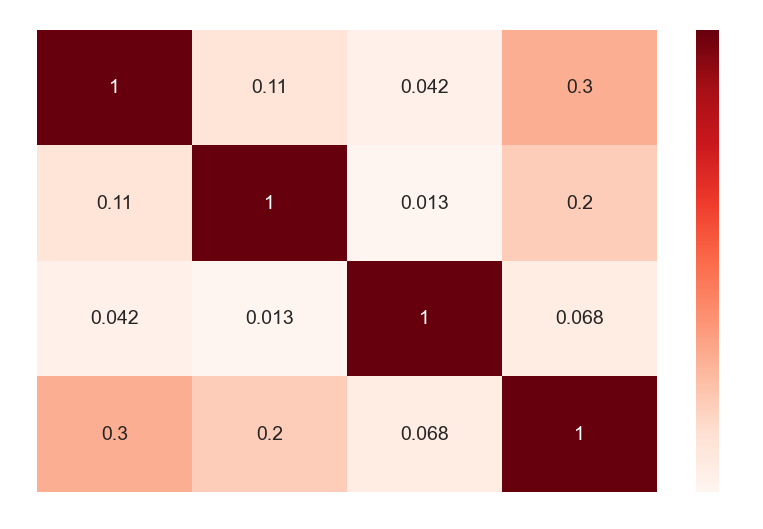

In [35]:
sns.heatmap(medical_df_v1.corr(),cmap='Reds',annot=True)
plt.title('Correlation Matrix')
plt.show()

<Axes: title={'center': 'Age vs. Charges'}, xlabel='age', ylabel='charges'>

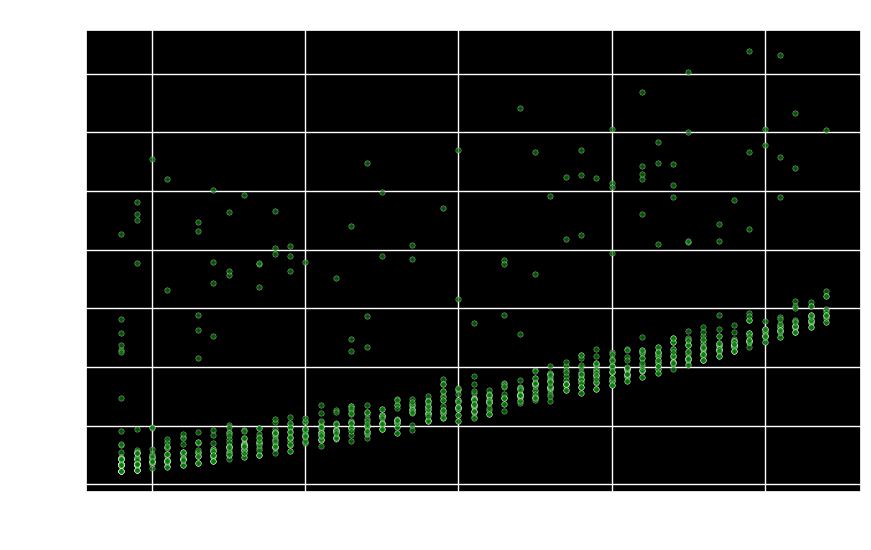

In [36]:
non_smoker_df=medical_df[medical_df.smoker=='no']
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df,x='age',y='charges',color='green',alpha=0.7,s=15)
